In [198]:

import warnings
warnings.filterwarnings("ignore")

import random
size = 200
random.seed(13)
bumpy = [ 50*random.random() for i in range(0,size)]
grade = [ 10*random.random() for i in range(0,size)]
error = [ 3*random.random() for i in range(0,size)]
#grade or slope
#this is our sample
#lets create target varible y with some error

speed = [ 370 - (6 * bumpy[i]) - (3.5* grade[i]) + (2*error[i]) for i in range(0,size) ]
speed


bumpy_new = [ [bumpy[i]] for i in range(0,size)]
grade_new = [ [grade[i]] for i in range(0,size)]
speed_new = [ [speed[i]] for i in range(0,size)]
    
    
#train and test data splitting

split = int(size * 0.75)
bumpy_train = bumpy_new[0:split]
bumpy_test = bumpy_new[split:size]

grade_train = grade_new[0:split]
grade_test =  grade_new[split:size]

speed_train = speed_new[0:split]
speed_test = speed_new[split:size]


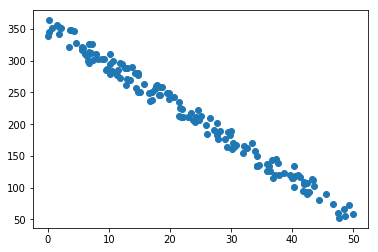

In [203]:
import matplotlib.pyplot as plt

plt.scatter(bumpy_train,speed_train)


In [237]:
from sklearn.linear_model import LinearRegression
import numpy as np
clf = LinearRegression()
clf.fit(bumpy_train,speed_train)
y = clf.predict(bumpy_test)
clf.score(bumpy_train,speed_train)

0.9848301031225042

In [238]:
clf.score(bumpy_test,speed_test)

0.9875184174113076

In [239]:

np.corrcoef(bumpy,speed)

array([[ 1.        , -0.99280336],
       [-0.99280336,  1.        ]])

In [240]:
m=clf.coef_
m[0,0]

-6.024158178493636

In [241]:
c=clf.intercept_
c[0]




355.77382972157875

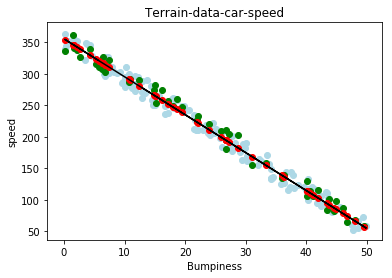

In [252]:
yplot = m[0]*bumpy_train +c[0]
import matplotlib.pyplot as plt
plt.scatter(bumpy_train,speed_train,color="lightblue",label="training points")
plt.scatter(bumpy_test,speed_test,color="green",label="testing points")
plt.scatter(bumpy_test,y,label="predicted values on test set",color="red")
plt.plot(bumpy_train,yplot,color="black")
plt.xlabel("Bumpiness")
plt.ylabel("speed")
plt.title("Terrain-data-car-speed")
plt.show()

In [95]:
clf = LinearRegression()
clf.fit(grade_train,speed_train)
y = clf.predict(grade_test)
clf.score(grade_train,speed_train)

0.024769233557081827

In [ ]:
#less impacting varible

"""
on camparring correlation between bumpy and speed vs grade and speed
bumpy speed more corealted upto max 99.2%

where as
grade spped has 2.4%

so impacting varible for y is  mostly bumpy for determing speed
thus accuracy is high with bumpy and grade 

with grade and speed its only 2.4 % 
so thats not a good model

Also the coeff value turns out to be nearly 6 and intercept 355.6

which is close to our actual fucntion where we encoperated error 


"""

In [206]:
#now lets include both features
X_new = [ [bumpy[i],grade[i]] for i in range(0,size)]
speed_new = [ [speed[i]] for i in range(0,size)]

split = int(size * 0.75)

X_train = X_new[0:split]
X_test = X_new[split:size]


speed_train = speed_new[0:split]
speed_test = speed_new[split:size]

    

In [208]:
clf = LinearRegression()
clf.fit(X_train,speed_train)
yp = clf.predict(X_test)
clf.score(X_train,speed_train)

0.9996429652178186

In [209]:
m=clf.coef_
m

array([[-5.99752314, -3.4619908 ]])

In [212]:
c=clf.intercept_
c

array([372.81821585])

In [177]:
ymean = np.mean(speed_train)
mean_err = speed_train - ymean
np.sum(mean_err)

3.865352482534945e-12

In [153]:
yp = clf.predict(X_train)

In [151]:
clf.score(X_test,speed_test)

0.9996537920998262

In [131]:
#
#0.9848301031225042 for bumpy as single feature

#with both features
#accuracy went higher 0.9996429652178186

#testing data too performed quite good





In [132]:
#lets test by passing a value 
#bumpymess = 46.89 , grade = 9.94
y = clf.predict([[46.89,9.94]])
y
#clf.score([[46.89,9.94]],speed_train)


array([[57.18216741]])

In [133]:
# original equation y =  370 - (6 * bumpy[i]) - (3.5* grade[i]) + (2*error[i])
370 - (6*46.89) - (3.5*9.94)

53.86999999999997

In [134]:
accuracy = 53.86999999999997/57.18216741

In [135]:
accuracy

0.942076917332434

In [156]:
#lets consider noise too , assuming they lie on gaussian surface
#with 95 % confidence i can say most of values lie within two standard deviation

#lets find error then 
residuals = speed_train - yp
residuals = residuals**2
#residuals

ymean = np.mean(speed_train)
mean_err = speed_train - ymean
mean_err= mean_err**2

np.sum(mean_err)
r2=1-(np.sum(residuals)/np.sum(mean_err))
r2

0.9996429652178187

In [155]:
np.sum(residuals)

378.38405225692804

In [183]:
# original equation y =  370 - (6 * bumpy[i]) - (3.5* grade[i]) + (2*error[i])
mean_err = 1.5389976824318667
2*mean_err
#pre abotained value 53.86999999999997 add err
53.86999999999997+2*mean_err

56.9479953648637

In [184]:
acc = 56.9479953648637/57.18216741

In [185]:
acc

0.9959048064153065

In [ ]:
#exellent our model has worked very very well

In [ ]:
#conclusion 
#adding both features are useful

In [192]:
#for  20000 samples

clf = LinearRegression()
clf.fit(X_train,speed_train)
yp = clf.predict(X_test)
clf.score(X_train,speed_train)

0.9996429652178186

In [ ]:
#that did not change much so adding number of samples really doesnt matter
#infact that decreased at 5th decimal


In [197]:
#plot visialziation
import seaborn as sns
sns.regplot([bumpy],speed_train)

ValueError: all the input array dimensions except for the concatenation axis must match exactly